In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

介入をランダムに割り振って実験し、その結果として得られたデータを比較する。

In [2]:
np.random.seed(0)

In [3]:
n_data = 60

In [4]:
# 学習意欲（X）
X = np.random.uniform(0, 100, n_data)

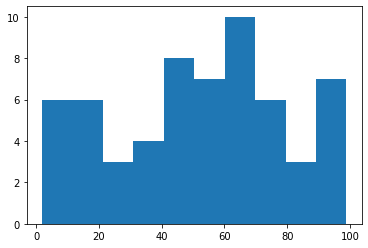

In [5]:
plt.hist(X)
plt.show()

In [6]:
# 特別講習の受講のフラグ（D）
D = np.random.choice([0, 1], p=[0.5, 0.5], size=n_data)

In [7]:
D # １：介入あり、２：介入なし

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1])

In [18]:
# 試験の得点（Y）
Y_noise = np.random.normal(0, 10, n_data)
Y = np.clip(0.5*X + 20*D + Y_noise, 0, 100).astype(int)

In [19]:
Y

array([38, 24, 38, 22, 16, 51, 51, 45, 55, 27, 49, 10, 60, 69, 32,  7,  9,
       35, 28, 50, 40, 33, 18, 59, 22, 18, 20, 24, 52, 24,  2, 59, 15, 63,
        0, 33, 50, 19, 72, 32, 45, 30, 76, 36, 29, 51, 41, 32, 22, 22, 28,
       34, 72,  4, 39, 11, 60, 28, 33, 28])

In [20]:
df = pd.DataFrame({
    "学習意欲 X": X,
    "介入フラグ D": D,
    "得点 Y": Y,
})

In [21]:
df.head(3)

,学習意欲 X,介入フラグ D,得点 Y
0,54.881350,0,38
1,71.518937,0,24
2,60.276338,1,38


In [22]:
df["介入フラグ D"].value_counts()

0    30
1    30
Name: 介入フラグ D, dtype: int64

In [23]:
df.groupby(by="介入フラグ D").mean() # D=1: 介入あり、D=0: 介入なし

,学習意欲 X,得点 Y
介入フラグ D,,
0,53.343969,24.000000
1,49.938682,45.733333


In [28]:
tmp = df.rename(columns={
    "学習意欲 X": "X",
    "介入フラグ D": "D",
    "得点 Y": "Y",
})

treatments = tmp[tmp["D"]==1]
controls = tmp[tmp["D"]==0]

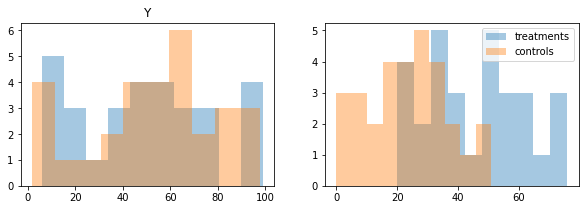

In [29]:
plt.figure(figsize=(10, 3))
ax1 = plt.subplot(121)
ax1.hist(treatments["X"], alpha=0.4, label="treatments")
ax1.hist(controls["X"], alpha=0.4, label="controls")
ax1.set_title("X")

ax2 = plt.subplot(122)
ax2.hist(treatments["Y"], alpha=0.4, label="treatments")
ax2.hist(controls["Y"], alpha=0.4, label="controls")
ax1.set_title("Y")

plt.legend()
plt.show()

介入の効果

$ E \lbrack Y_1 | do(D=1) \rbrack - E \lbrack Y_0 | do(D=0) \rbrack $

In [31]:
treatments["Y"].mean() - controls["Y"].mean()

21.733333333333334

上記の数値だけ効果があると解釈できる。

In [32]:
from scipy import stats

# 有意差検定
result = stats.mannwhitneyu(treatments["Y"], controls["Y"], alternative="two-sided")

In [34]:
result

MannwhitneyuResult(statistic=755.5, pvalue=6.4235561768717e-06)

$ p < 0.05 $ になるので帰無仮説は棄却され2群間の平均には差がある。なので、試験の得点を上げる効果があるといえる。